In [313]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [314]:
df=pd.read_csv('abalone.csv')

In [315]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [317]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [318]:
df.duplicated().sum()

0

No Null Data Present Into the Dataset

There is One Artibute in Categorical type so we convert into the Numeric

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [320]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']

print('No Of Numeric Features',len(numeric_features))
numeric_features

No Of Numeric Features 8


['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [321]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<25]
discrete_features

[]

No Discrete Features are present in Dataset

In [322]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("No Of Categorical Feature",len(categorical_features))
categorical_features

No Of Categorical Feature 1


['Sex']

Univerian Analysis

<AxesSubplot:xlabel='Rings'>

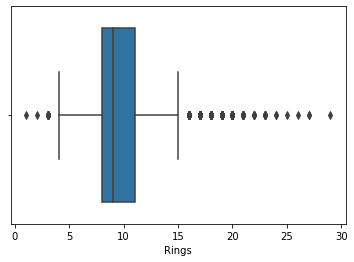

In [323]:
sns.boxplot(df['Rings'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

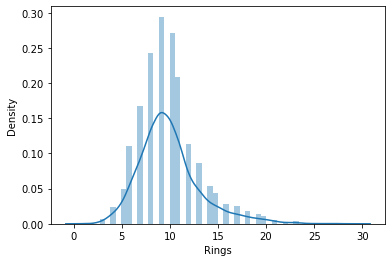

In [324]:
sns.distplot(df['Rings'],kde=True)

This Show That ring's value having range between 1 to 29-30.


Most of the value are concentrated around Mean of the Rings.


this seems data data may be normally distibuted for Rings

<AxesSubplot:xlabel='Sex', ylabel='count'>

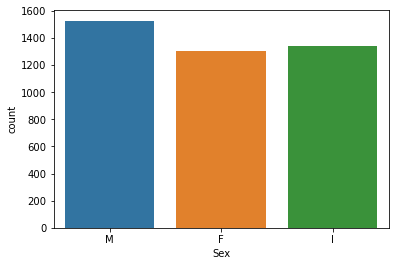

In [325]:
sns.countplot(df['Sex'])

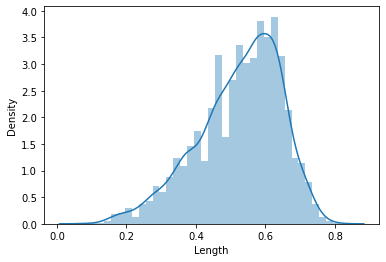

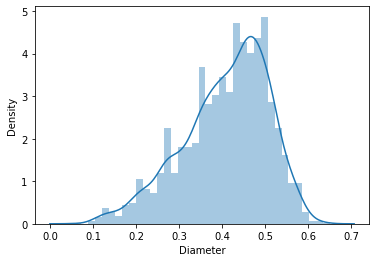

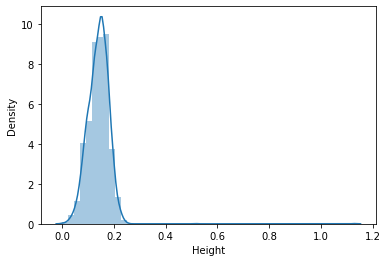

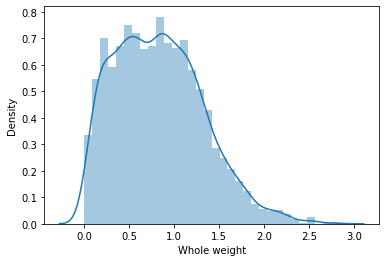

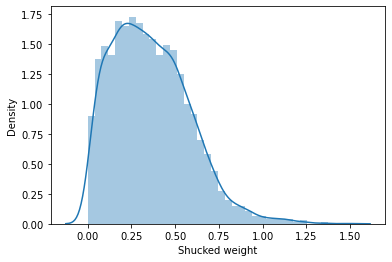

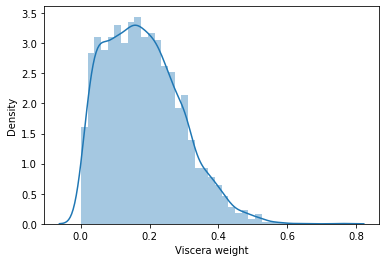

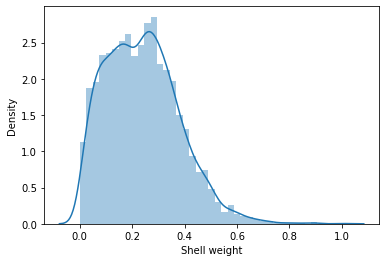

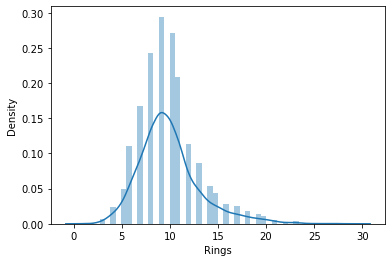

In [326]:
for i in numeric_features:
    plt.figure()
    sns.distplot(df[i],kde=True)   

This Figure Shows Skewness Present in Dataset & it will remove in Data Cleaning part.

Bi Veriant Analysis

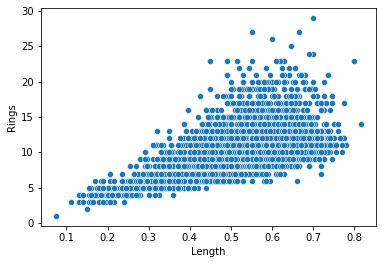

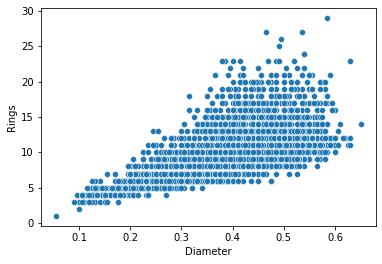

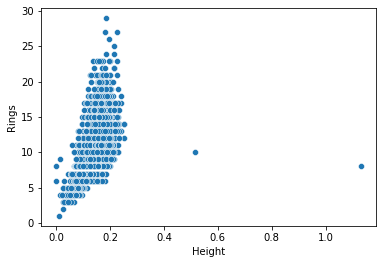

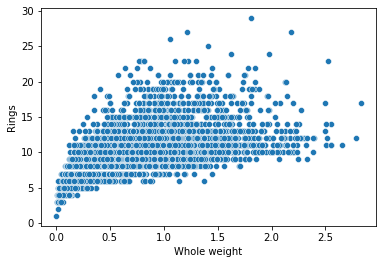

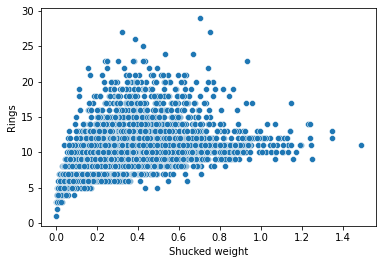

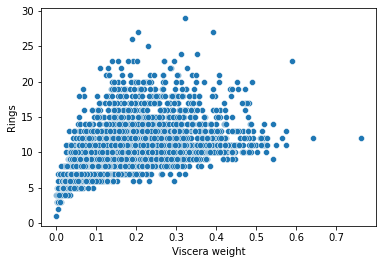

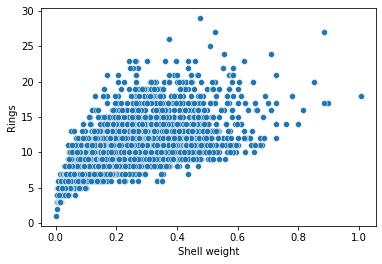

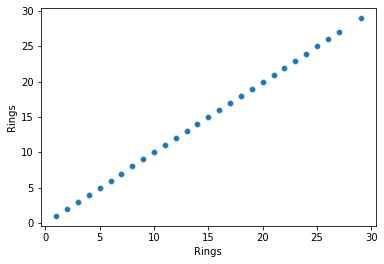

In [327]:
for i in numeric_features:
    plt.figure()
    sns.scatterplot(x=df[i],y='Rings',data=df)
    

This is indicate that for the Lower value of ring data is concentred and as the rings value increases data is spred.

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

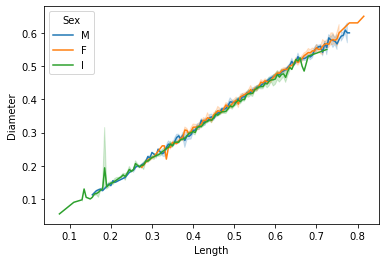

In [328]:
sns.lineplot(x='Length',y='Diameter',color='r',data=df,hue='Sex')

This chart shows the linear relation between Length & Diameter so we will drop any one during Data cleaning Process 


<AxesSubplot:xlabel='Whole weight', ylabel='Shucked weight'>

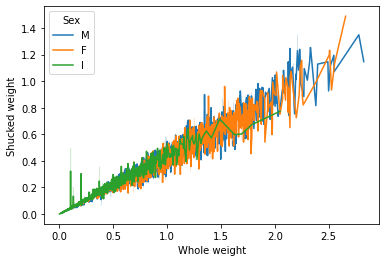

In [329]:
sns.lineplot(x='Whole weight',y='Shucked weight',data=df,color='r',hue='Sex')

This chart shows the linear relation between Length & Diameter so we will drop any one during Data cleaning Process

This chart also indicate that No any differance on Corelation because of Gender(Sex).

<AxesSubplot:xlabel='Length', ylabel='Rings'>

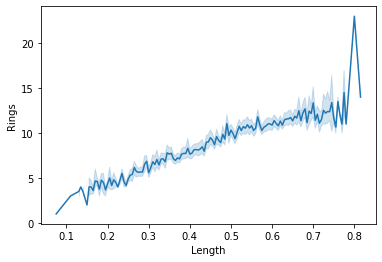

In [330]:
sns.lineplot(x='Length',y='Rings',data=df)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

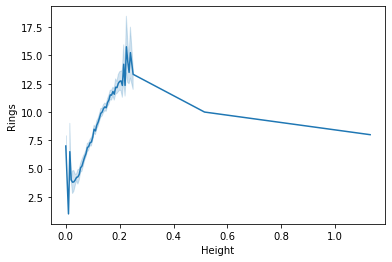

In [331]:
sns.lineplot(x='Height',y='Rings',data=df)

From this chart we can say that up to the ring(=12.5)or upto age of 12.5 height of Abalone Increases after that Decreases.

There is Linear Relation Diameter and Length

In [332]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [333]:
corr=df.corr()

<AxesSubplot:>

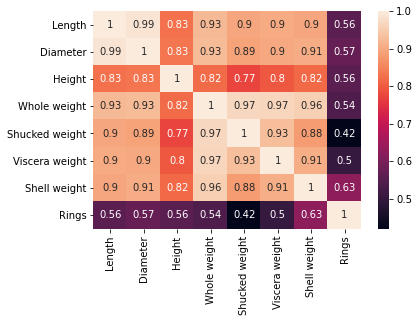

In [334]:
sns.heatmap(corr,annot=True)

From This Heat Map we can sea that, Artibutes having Multi Colinerarity. so tha we have to use VIF

In [335]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [336]:
from sklearn.preprocessing import LabelEncoder

In [337]:
lb=LabelEncoder()

In [338]:
df['Sex']=lb.fit_transform(df['Sex'])

In [339]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [340]:
df.shape

(4177, 9)

In [341]:
x=df.iloc[:,:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [342]:
x.shape

(4177, 8)

In [343]:
x.shape[1]

8

# VIF

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [345]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [346]:
valcal()

   vif factor        features
0    2.555356             Sex
1  700.488988          Length
2  749.121626        Diameter
3   42.128924          Height
4  421.652484    Whole weight
5  101.674946  Shucked weight
6   63.585627  Viscera weight
7   81.873737    Shell weight


# Data Cleaning

In [347]:
sd=pd.DataFrame({'Columns Name':['Length','Diameter','Shucked Weight','Whole Weight']})

In [348]:
sd['VIF']=[700,749,101,421]
sd['Relation with Rings']=[0.56,0.57,0.42,0.54]

In [349]:
sd

,Columns Name,VIF,Relation with Rings
0,Length,700,0.56
1,Diameter,749,0.57
2,Shucked Weight,101,0.42
3,Whole Weight,421,0.54


Here Length & Diameter and Shucked weight & Whole weight having high VIF. so Legth having less relation with ring as compaired 
to Diameter and Shucked weight having less relation as compair to whole weight so we droped both.

In [350]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [351]:
df.shape

(4177, 7)

Sex                  AxesSubplot(0.125,0.125;0.0945122x0.755)
Diameter          AxesSubplot(0.238415,0.125;0.0945122x0.755)
Height            AxesSubplot(0.351829,0.125;0.0945122x0.755)
Whole weight      AxesSubplot(0.465244,0.125;0.0945122x0.755)
Viscera weight    AxesSubplot(0.578659,0.125;0.0945122x0.755)
Shell weight      AxesSubplot(0.692073,0.125;0.0945122x0.755)
Rings             AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

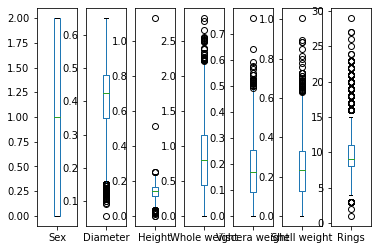

In [352]:
df.plot(kind='box',subplots=True)

This chart shows that outliers are present in data

Outliers

In [353]:
from scipy.stats import zscore

In [354]:
z=np.abs(zscore(df))
z

array([[1.15198011, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [355]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  238,  270,  275,
        277,  278,  294,  310,  313,  314,  334,  351,  355,  358,  358,
        362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
        526,  530,  572,  628,  673,  674,  675,  678,  694,  696,  719,
        720,  744,  754,  756,  811,  891,  891, 1048, 1051, 1052, 1204,
       1206, 1207, 1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428,
       1429, 1757, 1759, 1762, 1762, 1763, 1763, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811, 2863, 2863,
       3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193, 3280, 3359,
       3427, 3427, 3599, 3628, 3715, 3715, 3715, 3800, 3837, 3899, 3924,
       3930, 3944, 3996, 4145, 4148], dtype=int64)

In [356]:
z[6][6]

3.12251641377204

In [357]:
df1=df[(z<3).all(axis=1)]

In [358]:
df1.shape

(4050, 7)

In [359]:
loss_percentage=(4177-4050)/4177*100
loss_percentage

3.040459660043093

After Removing Outliers we loss 3% of data.

In [360]:
df=df1

In [361]:
df.shape

(4050, 7)

In [362]:
x=df.iloc[:,:-1]

In [363]:
y=df.iloc[:,-1]

In [364]:
y.shape

(4050,)

In [365]:
x.shape

(4050, 6)

Skewness

In [366]:
df.skew()

Sex              -0.098078
Diameter         -0.598478
Height           -0.248237
Whole weight      0.388193
Viscera weight    0.455795
Shell weight      0.365540
Rings             0.716011
dtype: float64

Data does not having more Skew after removing Outliers.

Data Scaling

In [367]:
from sklearn.preprocessing import StandardScaler

In [368]:
scale=StandardScaler()
x1=scale.fit_transform(x)

In [369]:
x1

array([[ 1.15682064, -0.42176554, -1.16116187, -0.63340556, -0.72366849,
        -0.63247034],
       [ 1.15682064, -1.45625586, -1.29557866, -1.25426925, -1.22524216,
        -1.25071252],
       [-1.28652934,  0.14720414, -0.08582761, -0.28262296, -0.33674023,
        -0.1687887 ],
       ...,
       [ 1.15682064,  0.71617382,  1.79600736,  0.79124525,  1.05811226,
         0.58855797],
       [-1.28652934,  0.81962285,  0.31742274,  0.61585395,  0.80493698,
         0.49582164],
       [ 1.15682064,  1.54376608,  1.5271738 ,  2.45369653,  1.90839906,
         2.03369908]])

In [370]:
x=x1

In [371]:
x

array([[ 1.15682064, -0.42176554, -1.16116187, -0.63340556, -0.72366849,
        -0.63247034],
       [ 1.15682064, -1.45625586, -1.29557866, -1.25426925, -1.22524216,
        -1.25071252],
       [-1.28652934,  0.14720414, -0.08582761, -0.28262296, -0.33674023,
        -0.1687887 ],
       ...,
       [ 1.15682064,  0.71617382,  1.79600736,  0.79124525,  1.05811226,
         0.58855797],
       [-1.28652934,  0.81962285,  0.31742274,  0.61585395,  0.80493698,
         0.49582164],
       [ 1.15682064,  1.54376608,  1.5271738 ,  2.45369653,  1.90839906,
         2.03369908]])

In [372]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [373]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [374]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    if round(lr.score(x_train,y_train)*100,2)==round(lr.score(x_test,y_test)*100,2):
        print("At Random State",i,'score is best')
        print('Test Score',lr.score(x_test,y_test))
        print('Train Score',lr.score(x_train,y_train))

At Random State 659 score is best
Test Score 0.4532770660965495
Train Score 0.4533203641955117
At Random State 763 score is best
Test Score 0.4539127661629633
Train Score 0.4538996174482064


In [375]:
predy_test=lr.predict(x_test)

In [376]:
predy_train=lr.predict(x_train)

In [377]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=659)

In [435]:
lr.score(x_test,y_test)

0.4577185260702882

In [379]:
lr.intercept_

9.752932697155325

In [380]:
lg.coef_

array([ 0.04800361,  0.67869653,  0.93488726, -2.71494121,  0.06961334,
        2.86422395])

In [381]:
from sklearn.metrics import r2_score

In [382]:
r2_score(y_test,pred)

-0.3936852675821467

In [383]:
print('Mean Absoluate Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean Absoluate Error 2.7134349192649467
Mean Squared Error 12.361004820513708
Root mean Squared Error: 3.515822068949694


In [384]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [385]:
dtc=DecisionTreeRegressor()
kn=KNeighborsRegressor(n_neighbors=5)
svm=SVR()
svmp=SVR(kernel='poly')
svml=SVR(kernel='linear')

In [386]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred))

In [387]:
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Taining Score:-',dtc.score(x_train,y_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,preddtc))
print('Mean Squared Error',mean_squared_error(y_test,preddtc))
print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,preddtc)))
print('R2 Score',r2_score(y_test,preddtc))

Taining Score:- 100.0
Mean Absolute Error 2.091358024691358
Mean Squared Error 8.644444444444444
Root Mean Squared Erro 2.940143609493326
R2 Score 0.0253514949965149


In [388]:
fun(dtc)

Taining Score:- 100.0
Mean Absolute Error 2.060493827160494
Mean Squared Error 8.492592592592592
Root Mean Squared Erro 2.9142053106451837
R2 Score 0.042472569848761244


In [389]:
fun(kn)

Taining Score:- 63.492401580663284
Mean Absolute Error 1.6081481481481483
Mean Squared Error 4.903358024691358
Root Mean Squared Erro 2.2143527326718653
R2 Score 0.4471535332344413


In [390]:
fun(svm)

Taining Score:- 49.978308343513824
Mean Absolute Error 1.511128532691138
Mean Squared Error 4.726112738204661
Root Mean Squared Erro 2.1739624509647495
R2 Score 0.46713768081077256


In [391]:
predsvm=svm.predict(x_test)

In [392]:
fun(svml)

Taining Score:- 42.74581754101767
Mean Absolute Error 1.5927541884715217
Mean Squared Error 5.165793372208886
Root Mean Squared Erro 2.2728381755437157
R2 Score 0.41756433050870534


In [393]:
fun(svmp)

Taining Score:- 33.469151896806046
Mean Absolute Error 1.7187468643286539
Mean Squared Error 6.070590056347496
Root Mean Squared Erro 2.4638567442827304
R2 Score 0.3155498238281108


# Ensembel Method

In [394]:
from sklearn.ensemble import RandomForestRegressor

In [395]:
rdr=RandomForestRegressor()

In [396]:
fun(rdr)

Taining Score:- 92.99228394320752
Mean Absolute Error 1.5747037037037037
Mean Squared Error 4.539285061728395
Root Mean Squared Erro 2.1305598000826906
R2 Score 0.48820222888452314


In [397]:
from sklearn.ensemble import AdaBoostClassifier

In [398]:
fun(ad)

Taining Score:- 20.246913580246915
Mean Absolute Error 3.106172839506173
Mean Squared Error 19.97037037037037
Root Mean Squared Erro 4.468822033866461
R2 Score -1.251630136666149


In [399]:
from sklearn.ensemble import GradientBoostingClassifier

In [400]:
gd=GradientBoostingClassifier()

In [401]:
fun(gd)

Taining Score:- 66.60493827160494
Mean Absolute Error 1.7469135802469136
Mean Squared Error 6.907407407407407
Root Mean Squared Erro 2.6281947050033048
R2 Score 0.22119988781855193


# Regurization

In [402]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet,Lasso,Ridge

In [403]:
ls=Lasso(alpha=0.00001,copy_X=True,max_iter=100,normalize=True,selection='cyclic')

# Hyper Tuning

In [404]:
param={'normalize':['True','False'],'alpha':[1.0,0.1,0.001,0.0001,0.00001],'max_iter':[10,100,1000],'selection':['cyclic','random'],'copy_X':['True','False']}

In [405]:
gd=GridSearchCV(ls,param)
gd.fit(x,y)

GridSearchCV(estimator=Lasso(alpha=1e-05, max_iter=100, normalize=True),
             param_grid={'alpha': [1.0, 0.1, 0.001, 0.0001, 1e-05],
                         'copy_X': ['True', 'False'],
                         'max_iter': [10, 100, 1000],
                         'normalize': ['True', 'False'],
                         'selection': ['cyclic', 'random']})

In [406]:
fun(ls)

Taining Score:- 45.3313595226845
Mean Absolute Error 1.623981144855077
Mean Squared Error 4.849937290868276
Root Mean Squared Erro 2.202257317133553
R2 Score 0.45317664307006733


In [407]:
rd=Ridge()

In [408]:
param1={'alpha':[10,1,0.1,0.01,0.001,0.0001],'normalize':['True','False'],'copy_X':['Ture','False'],'max_iter':[10,100,1000],'solver':['auto','svd','cholesky','isqr','sparse_cg','sag','saga']}

In [409]:
gd=GridSearchCV(estimator=rd,param_grid=param1)
gd.fit(x,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'copy_X': ['Ture', 'False'],
                         'max_iter': [10, 100, 1000],
                         'normalize': ['True', 'False'],
                         'solver': ['auto', 'svd', 'cholesky', 'isqr',
                                    'sparse_cg', 'sag', 'saga']})

In [410]:
print(gd.best_params_)

{'alpha': 0.001, 'copy_X': 'Ture', 'max_iter': 10, 'normalize': 'True', 'solver': 'sag'}


In [411]:
rd1=Ridge(alpha=0.0001,copy_X=True,max_iter=10,normalize=False,solver='sag')

In [412]:
fun(rd1)

Taining Score:- 45.312522798605436
Mean Absolute Error 1.6241039955650987
Mean Squared Error 4.847006867782682
Root Mean Squared Erro 2.2015918940127577
R2 Score 0.4535070439995612


In [413]:
es=ElasticNet()

In [414]:
param2={'alpha':[1,10,100,0.01,0.001,0.0001],'max_iter':[10,50,250,500,1000],'selection':['cyclic','random'],'normalize':['True','False']}

In [415]:
gd2=GridSearchCV(es,param2)
gd2.fit(x,y)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 10, 100, 0.01, 0.001, 0.0001],
                         'max_iter': [10, 50, 250, 500, 1000],
                         'normalize': ['True', 'False'],
                         'selection': ['cyclic', 'random']})

In [416]:
print(gd2.best_params_)

{'alpha': 0.0001, 'max_iter': 500, 'normalize': 'False', 'selection': 'random'}


In [417]:
es1=ElasticNet(alpha=0.0001,max_iter=250,normalize=True,selection='random')

In [418]:
fun(es1)

Taining Score:- 40.82223058881148
Mean Absolute Error 1.7133455998103002
Mean Squared Error 5.42303689610815
Root Mean Squared Erro 2.328741483314142
R2 Score 0.3885604983247437


# Cross Validation

In [419]:
from sklearn.model_selection import cross_val_score

In [420]:
for i in range(2,10):
    crs_score=cross_val_score(svm,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 47.070060413209916
CV Value 3
Score 47.11191798060684
CV Value 4
Score 43.81870616031328
CV Value 5
Score 43.26051403072537
CV Value 6
Score 43.90930425385659
CV Value 7
Score 44.12107133908207
CV Value 8
Score 43.33653379363343
CV Value 9
Score 44.046110368381946


In [421]:
for i in range(2,11):
    crs_score=cross_val_score(svml,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('CV Score',score*100)

CV Value 2
CV Score 42.23099407350507
CV Value 3
CV Score 41.488151874748986
CV Value 4
CV Score 35.62379311404952
CV Value 5
CV Score 35.741589095854245
CV Value 6
CV Score 36.275667786843925
CV Value 7
CV Score 36.76355099302328
CV Value 8
CV Score 36.53229740452109
CV Value 9
CV Score 38.05481359258739
CV Value 10
CV Score 34.8472423954039


In [422]:
for i in range(2,11):
    crs_score=cross_val_score(svmp,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('CV Score',score*100)

CV Value 2
CV Score 31.64020946994861
CV Value 3
CV Score 31.869989843496583
CV Value 4
CV Score 26.04416842648152
CV Value 5
CV Score 25.70916622485172
CV Value 6
CV Score 26.840477055589652
CV Value 7
CV Score 28.185654098033613
CV Value 8
CV Score 27.04647330729631
CV Value 9
CV Score 28.718144986538363
CV Value 10
CV Score 24.401511716763064


In [423]:
for i in range(2,10):
    crs_score=cross_val_score(dtc,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -4.915636291526715
CV Value 3
Score -3.889517317883858
CV Value 4
Score -21.826566240866853
CV Value 5
Score -14.462531341961169
CV Value 6
Score -15.479636739135152
CV Value 7
Score -16.86703534342442
CV Value 8
Score -33.36284019312576
CV Value 9
Score -20.219842789568478


In [424]:
for i in range(2,10):
    crs_score=cross_val_score(kn,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 42.053429174387944
CV Value 3
Score 42.07490185762926
CV Value 4
Score 34.227121112478876
CV Value 5
Score 35.245010473175576
CV Value 6
Score 36.132887259182425
CV Value 7
Score 36.610191198031735
CV Value 8
Score 32.551070378917025
CV Value 9
Score 36.68535097475482


In [425]:
for i in range(2,10):
    crs_score=cross_val_score(rdr,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 45.76713713416029
CV Value 3
Score 45.98864998852021
CV Value 4
Score 37.72842112900676
CV Value 5
Score 38.42685413785661
CV Value 6
Score 39.66203886138661
CV Value 7
Score 39.49907916919006
CV Value 8
Score 35.853181988645204
CV Value 9
Score 39.921670285906984


In [426]:
for i in range(2,11):
    crs_score=cross_val_score(ad,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 20.8641975308642
CV Value 3
Score 18.59259259259259
CV Value 4
Score 19.704049920207265
CV Value 5
Score 17.629629629629626
CV Value 6
Score 18.19753086419753
CV Value 7
Score 15.852369597640944
CV Value 8
Score 17.531729697281534
CV Value 9
Score 17.38271604938272
CV Value 10
Score 16.987654320987655


In [427]:
for i in range(2,10):
    crs_score=cross_val_score(gd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 44.753356113012856
CV Value 3
Score 43.16542625801013
CV Value 4
Score 34.55271241699421
CV Value 5
Score 34.84743956705816
CV Value 6
Score 35.59536678407917
CV Value 7
Score 36.4628216170734
CV Value 8
Score 32.97726748494022
CV Value 9
Score 36.5032246148092


In [428]:
for i in range(2,11):
    crs_score=cross_val_score(ls,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 45.0349998791266
CV Value 3
Score 43.45957876004001
CV Value 4
Score 34.707646322363125
CV Value 5
Score 34.82644650935073
CV Value 6
Score 35.77880331345748
CV Value 7
Score 36.72880645376663
CV Value 8
Score 33.3189571869562
CV Value 9
Score 36.631797503698905
CV Value 10
Score 31.030017273039718


In [429]:
for i in range(2,11):
    crs_score=cross_val_score(rd1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 44.992262969939375
CV Value 3
Score 43.37315513510905
CV Value 4
Score 34.79884337059739
CV Value 5
Score 34.76837059260417
CV Value 6
Score 35.72924708990914
CV Value 7
Score 36.52210159495798
CV Value 8
Score 33.6246423959866
CV Value 9
Score 35.55412041414851
CV Value 10
Score 31.002857373558758


In [430]:
for i in range(2,11):
    crs_score=cross_val_score(es1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 41.52083568000548
CV Value 3
Score 39.66153975488121
CV Value 4
Score 30.528425228738893
CV Value 5
Score 28.509609298940543
CV Value 6
Score 31.934221177291345
CV Value 7
Score 32.85313599229716
CV Value 8
Score 30.64667191207845
CV Value 9
Score 32.37289815311601
CV Value 10
Score 26.283540770669227


For Cross Validation cv=2 we get best result.

In [431]:
df=pd.DataFrame()

In [432]:
df['Model']=['svm','svml','svmp','dtc','kn','rdr','ad','gd','ls','rd1','es1']
df['Train Score']=[50.72,43.63,34.46,100,63.69,92.97,24.44,66.97,46.17,46.17,41.43]
df['RMSE']=[2.13,2.24,2.39,2.21,2.21,2.13,2.59,2.55,2.19,2.19,2.27]
df['MAE']=[1.48,1.56,1.66,1.59,1.59,1.58,1.70,1.72,1.61,1.61,1.67]
df['R2 Score']=[0.45,0.39,0.31,0.41,0.41,0.45,0.19,0.21,0.42,0.42,0.37]
df['Cv Score']=[47.07,42.23,31.64,-2.19,42.05,46.23,20.86,23.65,45.03,45.04,41.52]
df

,Model,Train Score,RMSE,MAE,R2 Score,Cv Score
0,svm,50.72,2.13,1.48,0.45,47.07
1,svml,43.63,2.24,1.56,0.39,42.23
2,svmp,34.46,2.39,1.66,0.31,31.64
3,dtc,100.00,2.21,1.59,0.41,-2.19
4,kn,63.69,2.21,1.59,0.41,42.05
5,rdr,92.97,2.13,1.58,0.45,46.23
6,ad,24.44,2.59,1.70,0.19,20.86
7,gd,66.97,2.55,1.72,0.21,23.65
8,ls,46.17,2.19,1.61,0.42,45.03
9,rd1,46.17,2.19,1.61,0.42,45.04


From This Tabel we select SVM for Model Saving.

# Model Saving:-

In [433]:
import pickle
filename='Abalone_Prediction.pkl'
pickle.dump(svm,open(filename,'wb'))

# Conclusion:

      Actual    Predict
3542       8   7.230501
3984      10  10.659370
2197      10   7.704249
309       10  10.662009
3942      11   9.471013
...      ...        ...
2577       7   8.730883
2080       9  10.555737
2817       7   5.743544
1682      11  10.589316
3522       4   5.049487

[810 rows x 2 columns]


Text(0.5, 1.0, 'Regressor Line')

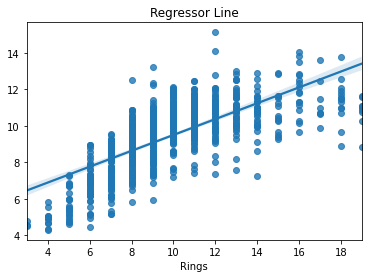

In [434]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=predsvm

print(res)
sns.regplot(y_test,predsvm)
plt.title('Regressor Line')